In [1]:
!python -m pip install jupyter-rdfify graphviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cfgraph: filename=CFGraph-0.2.1-py3-none-any.whl size=2214 sha256=98447ecd26af15ab6b5c2d7953b0462c7075946f610ce21820defe1adff5ded8
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dpe15eq/wheels/8b/ac/8f/0f5b041561f10e6db39796e4ad11011b8f5a4b0a0ed74a5e61
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=9a2def163099a965b9e08ffc872ea640c6e4ae81a1eca3b66f7a2d31ac9e187b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dpe15eq/wheels/1a/97/32/461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built cfgraph antlr4-python3-runtime


In [4]:
%load_ext jupyter-rdfify

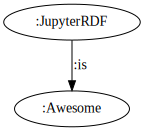

In [5]:
%%rdf turtle
@prefix : <http://example.org/> .
:JupyterRDF :is :Awesome .

In [6]:
%%rdf turtle --display raw --serialize json-ld
@prefix : <http://example.org/> .
:JupyterRDF :is :Awesome .

[
  {
    "@id": "http://example.org/JupyterRDF",
    "http://example.org/is": [
      {
        "@id": "http://example.org/Awesome"
      }
    ]
  }
]

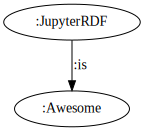

In [7]:
%%rdf turtle --label awesome_graph
@prefix : <http://example.org/> .
:JupyterRDF :is :Awesome .

In [8]:
%%rdf sparql --endpoint https://query.wikidata.org/sparql
SELECT ?item ?itemLabel 
WHERE 
{
  ?item wdt:P31 wd:Q146.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} LIMIT 10

item,itemLabel
<http://www.wikidata.org/entity/Q378619>,CC@en
<http://www.wikidata.org/entity/Q498787>,Muezza@en
<http://www.wikidata.org/entity/Q677525>,Orangey@en
<http://www.wikidata.org/entity/Q893453>,Unsinkable Sam@en
<http://www.wikidata.org/entity/Q1050083>,Catmando@en
<http://www.wikidata.org/entity/Q1185550>,Oscar@en
<http://www.wikidata.org/entity/Q1201902>,Tama@en
<http://www.wikidata.org/entity/Q1207136>,Dewey Readmore Books@en
<http://www.wikidata.org/entity/Q1371145>,Socks@en
<http://www.wikidata.org/entity/Q1386318>,F. D. C. Willard@en


In [9]:
%%rdf sparql --local awesome_graph
PREFIX : <http://example.org/>
SELECT ?x WHERE {
    ?x :is :Awesome
}

?x
http://example.org/JupyterRDF


In [10]:
%%rdf shex parse --label awesome_schema
PREFIX : <http://example.org/>
:AwesomeShape {
    :is [:Awesome]
}

ShEx: Shape successfully parsed.


In [11]:
%rdf shex validate --label awesome_schema --graph awesome_graph --start http://example.org/AwesomeShape --focus http://example.org/JupyterRDF

ShEx: Evaluating shape 'http://example.org/AwesomeShape' on node 'http://example.org/JupyterRDF'
PASSED!
